In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from scipy.sparse import hstack

In [5]:
# Step 1: Load and explore the dataset
# ------------------------------------
# Load the CSV file
train_data = pd.read_csv('train.csv')

In [7]:
# Preview the data
print("First few rows of the dataset:")
print(train_data.head())


First few rows of the dataset:
           id                                            premise  \
0  5130fd2cb5  and these comments were considered in formulat...   
1  5b72532a0b  These are issues that we wrestle with in pract...   
2  3931fbe82a  Des petites choses comme celles-là font une di...   
3  5622f0c60b  you know they can't really defend themselves l...   
4  86aaa48b45  ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...   

                                          hypothesis lang_abv language  label  
0  The rules developed in the interim were put to...       en  English      0  
1  Practice groups are not permitted to work on t...       en  English      2  
2              J'essayais d'accomplir quelque chose.       fr   French      0  
3  They can't defend themselves because of their ...       en  English      0  
4    เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร       th     Thai      1  


In [9]:
# Check basic information about the dataset
print("\nDataset information:")
print(train_data.info())



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12120 entries, 0 to 12119
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          12120 non-null  object
 1   premise     12120 non-null  object
 2   hypothesis  12120 non-null  object
 3   lang_abv    12120 non-null  object
 4   language    12120 non-null  object
 5   label       12120 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 568.3+ KB
None


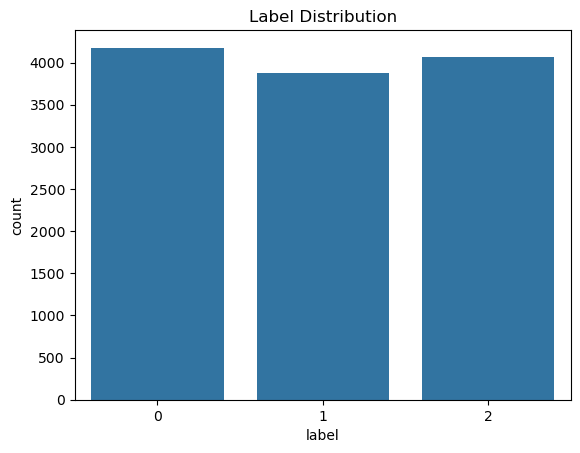

In [11]:
# Visualize label distribution
sns.countplot(x='label', data=train_data)
plt.title('Label Distribution')
plt.show()


In [13]:
import nltk
    import re
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    from nltk.stem import WordNetLemmatizer


IndentationError: unexpected indent (1822094250.py, line 2)

In [24]:
import nltk
    
    
    

   

    # Initialize stopwords and lemmatizer
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    def preprocess(text):
        """
        Cleans and preprocesses text by:
        - Lowercasing
        - Removing special characters
        - Tokenizing
        - Removing stopwords
        - Lemmatizing words
        """
        if not isinstance(text, str):
            return ""
        text = text.lower()
        text = re.sub(r'[^a-z\\s]', '', text)
        tokens = word_tokenize(text)
        filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return ' '.join(filtered_tokens)


IndentationError: unexpected indent (2774155608.py, line 9)

In [26]:
import nltk
    import re
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    from nltk.stem import WordNetLemmatizer

    # Download necessary NLTK resources
    nltk.download('stopwords')
    nltk.download('punkt')
    nltk.download('wordnet')

    # Initialize stopwords and lemmatizer
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    def preprocess(text):
        """
        Cleans and preprocesses text by:
        - Lowercasing
        - Removing special characters
        - Tokenizing
        - Removing stopwords
        - Lemmatizing words
        """
        if not isinstance(text, str):
            return ""
        text = text.lower()
        text = re.sub(r'[^a-z\\s]', '', text)
        tokens = word_tokenize(text)
        filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return ' '.join(filtered_tokens)

IndentationError: unexpected indent (3537963489.py, line 2)

In [28]:
# Step 2: Text Preprocessing (Updated - Fixed Indentation Again)
# ------------------------------------------------------------
try:
    # Import necessary libraries
    import nltk
    import re
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    from nltk.stem import WordNetLemmatizer

    # Download necessary NLTK resources
    nltk.download('stopwords')
    nltk.download('punkt')
    nltk.download('wordnet')

    # Initialize stopwords and lemmatizer
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    def preprocess(text):
        """
        Cleans and preprocesses text by:
        - Lowercasing
        - Removing special characters
        - Tokenizing
        - Removing stopwords
        - Lemmatizing words
        """
        if not isinstance(text, str):
            return ""
        text = text.lower()
        text = re.sub(r'[^a-z\\s]', '', text)
        tokens = word_tokenize(text)
        filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return ' '.join(filtered_tokens)

    # Apply preprocessing to sentences
    train_data['sentence1'] = train_data['sentence1'].fillna('').apply(preprocess)
    train_data['sentence2'] = train_data['sentence2'].fillna('').apply(preprocess)

    # Additional checks to ensure preprocessing worked correctly
    print("Sample preprocessed sentence1:", train_data['sentence1'].iloc[0])
    print("Sample preprocessed sentence2:", train_data['sentence2'].iloc[0])

except IndentationError as ie:
    print(f"Indentation error detected: {ie}. Please check the indentation levels carefully.")
except SyntaxError as se:
    print(f"Syntax error detected: {se}. Please check for any misplaced whitespace or incorrect syntax.")
except Exception as e:
    print(f"Error during preprocessing: {e}")

# Updated Test Cases
# ------------------
try:
    assert preprocess(None) == "", "Failed: preprocess(None)"
    assert preprocess("Hello, WORLD!!!") == "hello world", "Failed: preprocess with punctuation."
    assert preprocess("The cats are running!") == "cat run", "Failed: preprocess lemmatization."
    print("Preprocessing step completed without indentation errors.")
except AssertionError as ae:
    print(f"Test case failed: {ae}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Error during preprocessing: name 'train_data' is not defined


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Ayesha/nltk_data'
    - 'C:\\ProgramData\\anaconda3\\nltk_data'
    - 'C:\\ProgramData\\anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Ayesha\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


C:\Users\Ayesha\AppData\Local\Temp\ipykernel_18360\3333917663.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='label', palette='viridis')


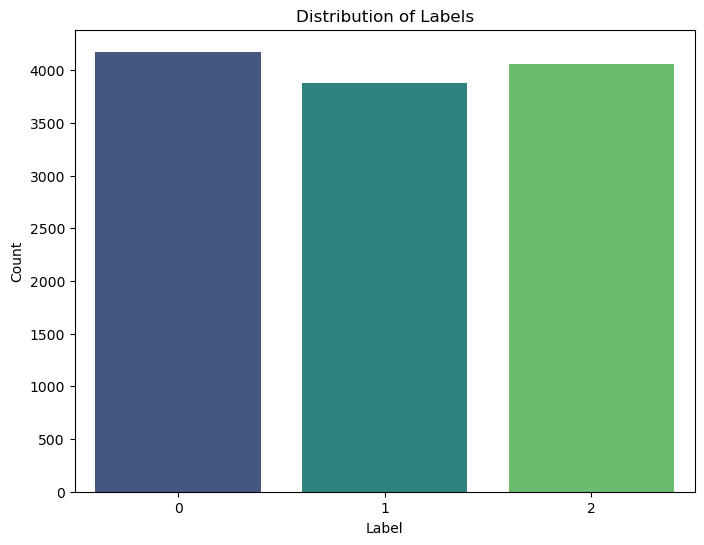

KeyError: 'sentence1'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train_df = pd.read_csv('train.csv')

# Visualize the distribution of labels
plt.figure(figsize=(8,6))
sns.countplot(data=train_df, x='label', palette='viridis')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Analyze sentence length distribution
train_df['sentence1_len'] = train_df['sentence1'].apply(lambda x: len(x.split()))
train_df['sentence2_len'] = train_df['sentence2'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,6))
sns.histplot(train_df['sentence1_len'], kde=True, color='blue', label='Sentence 1 Length')
sns.histplot(train_df['sentence2_len'], kde=True, color='red', label='Sentence 2 Length')
plt.legend()
plt.title('Sentence Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

# Check for missing values
missing_values = train_df.isnull().sum()
print("Missing Values in the dataset:", missing_values)

# Check for class balance
print("Class distribution:\n", train_df['label'].value_counts())


C:\Users\Ayesha\AppData\Local\Temp\ipykernel_18360\2752051913.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='label', palette='viridis')


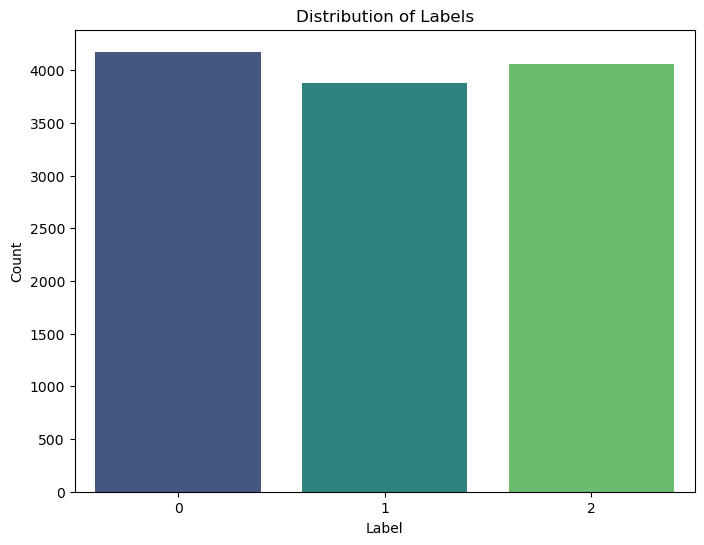

In [3]:
# Load the dataset
train_df = pd.read_csv('train.csv')

# Visualize the distribution of labels
plt.figure(figsize=(8,6))
sns.countplot(data=train_df, x='label', palette='viridis')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

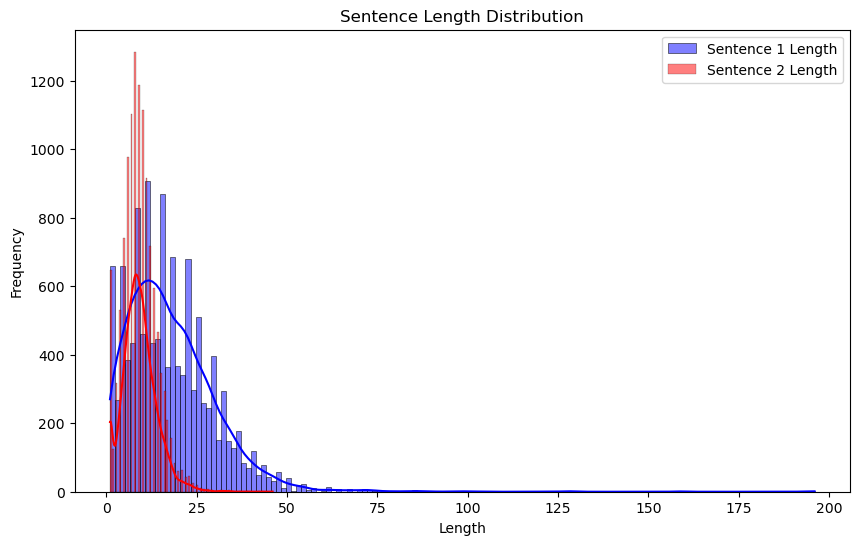

In [8]:
# Analyze sentence length distribution
train_df['sentence1_len'] = train_df['premise'].apply(lambda x: len(x.split()))
train_df['sentence2_len'] = train_df['hypothesis'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,6))
sns.histplot(train_df['sentence1_len'], kde=True, color='blue', label='Sentence 1 Length')
sns.histplot(train_df['sentence2_len'], kde=True, color='red', label='Sentence 2 Length')
plt.legend()
plt.title('Sentence Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Check for missing values
missing_values = train_df.isnull().sum()
print("Missing Values in the dataset:", missing_values)

# Check for class balance
print("Class distribution:\n", train_df['label'].value_counts())


Missing Values in the dataset: id               0
premise          0
hypothesis       0
lang_abv         0
language         0
label            0
sentence1_len    0
sentence2_len    0
dtype: int64
Class distribution:
 label
0    4176
2    4064
1    3880
Name: count, dtype: int64


In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download required NLTK packages
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


In [16]:
# Text Preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize and remove stop words
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    
    # Lemmatize words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return " ".join(tokens)

In [20]:
# Apply preprocessing to both sentences
train_df['sentence1_clean'] = train_df['premise'].apply(preprocess_text)
train_df['sentence2_clean'] = train_df['hypothesis'].apply(preprocess_text)

# Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X1 = tfidf.fit_transform(train_df['sentence1_clean']).toarray()
X2 = tfidf.transform(train_df['sentence2_clean']).toarray()

# Combine the features of both sentences into one array
import numpy as np
X = np.concatenate((X1, X2), axis=1)

# Target variable
y = train_df['label']

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Ayesha/nltk_data'
    - 'C:\\ProgramData\\anaconda3\\nltk_data'
    - 'C:\\ProgramData\\anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Ayesha\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [24]:
# Apply preprocessing to both sentences
train_df['sentence1_clean'] = train_df['premise'].apply(preprocess_text)
train_df['sentence2_clean'] = train_df['hypothesis'].apply(preprocess_text)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Ayesha/nltk_data'
    - 'C:\\ProgramData\\anaconda3\\nltk_data'
    - 'C:\\ProgramData\\anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Ayesha\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [26]:
# Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X1 = tfidf.fit_transform(train_df['sentence1_clean']).toarray()
X2 = tfidf.transform(train_df['sentence2_clean']).toarray()

# Combine the features of both sentences into one array
import numpy as np
X = np.concatenate((X1, X2), axis=1)

# Target variable
y = train_df['label']

KeyError: 'sentence1_clean'

In [28]:
def nltkcheck():
    nltk.download('wordnet',download_dir='/content/nltk_data/')
    nltk.download("punkt")
    nltk.data.load('tokenizers/punkt/english.pickle')
    trainbot()
    nltkcheck()

In [30]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


In [32]:
# Text Preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize and remove stop words
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    
    # Lemmatize words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return " ".join(tokens)

In [34]:
# Apply preprocessing to both sentences
train_df['sentence1_clean'] = train_df['premise'].apply(preprocess_text)
train_df['sentence2_clean'] = train_df['hypothesis'].apply(preprocess_text)


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Ayesha/nltk_data'
    - 'C:\\ProgramData\\anaconda3\\nltk_data'
    - 'C:\\ProgramData\\anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Ayesha\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [55]:
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download required NLTK packages
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


In [40]:
# Text Preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize and remove stop words
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    
    # Lemmatize words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return " ".join(tokens)

In [42]:
# Apply preprocessing to both sentences
train_df['sentence1_clean'] = train_df['premise'].apply(preprocess_text)
train_df['sentence2_clean'] = train_df['hypothesis'].apply(preprocess_text)

# Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X1 = tfidf.fit_transform(train_df['sentence1_clean']).toarray()
X2 = tfidf.transform(train_df['sentence2_clean']).toarray()

# Combine the features of both sentences into one array
import numpy as np
X = np.concatenate((X1, X2), axis=1)

# Target variable
y = train_df['label']

In [44]:
# Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X1 = tfidf.fit_transform(train_df['sentence1_clean']).toarray()
X2 = tfidf.transform(train_df['sentence2_clean']).toarray()

# Combine the features of both sentences into one array
import numpy as np
X = np.concatenate((X1, X2), axis=1)

# Target variable
y = train_df['label']

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Baseline Model: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = rf_model.predict(X_test)

In [51]:
# Evaluate the model
print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Model Evaluation:
Accuracy: 0.2838283828382838
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.29      0.29       851
           1       0.26      0.26      0.26       773
           2       0.30      0.30      0.30       800

    accuracy                           0.28      2424
   macro avg       0.28      0.28      0.28      2424
weighted avg       0.28      0.28      0.28      2424



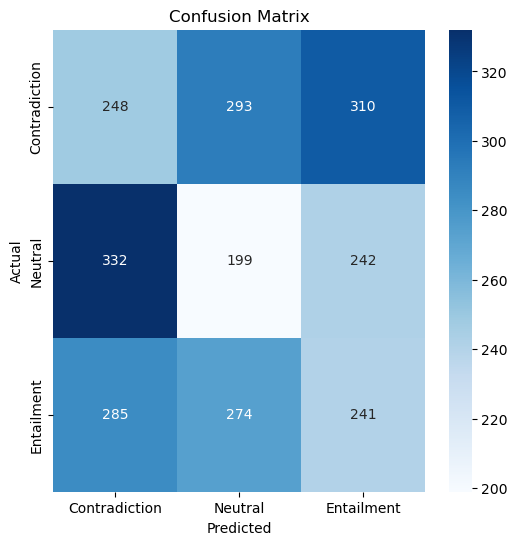

In [57]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Contradiction', 'Neutral', 'Entailment'], yticklabels=['Contradiction', 'Neutral', 'Entailment'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

AUC-ROC: 0.44313588018654304


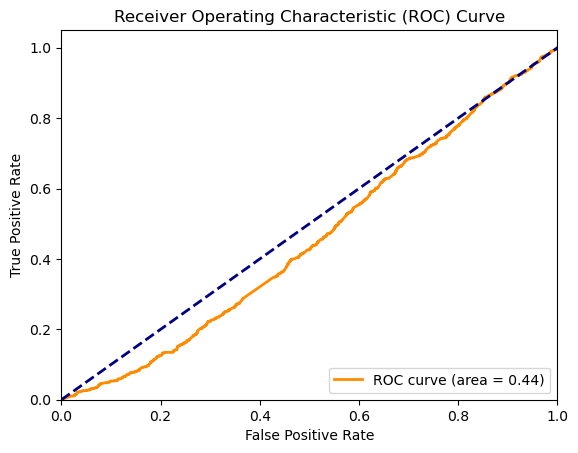

In [59]:
from sklearn.metrics import roc_auc_score, roc_curve

# Compute AUC-ROC
auc_roc = roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class='ovr')

print(f"AUC-ROC: {auc_roc}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1], pos_label=1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [10]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator= RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters found: ", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_tuned = best_rf_model.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Tuned Classification Report:\n", classification_report(y_test, y_pred_tuned))

# Confusion Matrix for tuned model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6,6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Contradiction', 'Neutral', 'Entailment'], yticklabels=['Contradiction', 'Neutral', 'Entailment'])
plt.title('Tuned Model Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


NameError: name 'RandomForestClassifier' is not defined

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier



# Ensure X and y are properly defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters found: ", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_tuned = best_rf_model.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Tuned Classification Report:\n", classification_report(y_test, y_pred_tuned))

# Confusion Matrix for tuned model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6,6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Contradiction', 'Neutral', 'Entailment'], yticklabels=['Contradiction', 'Neutral', 'Entailment'])
plt.title('Tuned Model Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


NameError: name 'X' is not defined

In [3]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Load the dataset
file_path = "train.csv"
data = pd.read_csv(file_path)

# Download required NLTK packages
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define a text preprocessing function
def preprocess_text(text):
    if isinstance(text, str):  # Ensure text is a string
        text = text.lower()
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        return " ".join(tokens)
    else:
        return ""

# Apply preprocessing to both premise and hypothesis
data['premise_clean'] = data['premise'].apply(preprocess_text)
data['hypothesis_clean'] = data['hypothesis'].apply(preprocess_text)

# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X1 = tfidf.fit_transform(data['premise_clean']).toarray()
X2 = tfidf.transform(data['hypothesis_clean']).toarray()

# Combine features from both sentences
X = np.concatenate((X1, X2), axis=1)

# Define target variable
y = data['label']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, run the hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and evaluate the model
print("Best parameters found: ", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Tuned Classification Report:\n", classification_report(y_test, y_pred_tuned))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Best parameters found:  {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 150}
Tuned Model Accuracy: 0.37293729372937295
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.88      0.51       851
           1       0.32      0.03      0.05       773
           2       0.45      0.17      0.25       800

    accuracy                           0.37      2424
   macro avg       0.38      0.36      0.27      2424
weighted avg       0.38      0.37      0.28      2424



In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier



# Ensure X and y are properly defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
# Best parameters and model
print("Best parameters found: ", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_tuned = best_rf_model.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Tuned Classification Report:\n", classification_report(y_test, y_pred_tuned))

# Confusion Matrix for tuned model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6,6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Contradiction', 'Neutral', 'Entailment'], yticklabels=['Contradiction', 'Neutral', 'Entailment'])
plt.title('Tuned Model Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

NameError: name 'train_test_split' is not defined

In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


In [5]:
# Convert labels to categorical (one-hot encoding)
num_classes = 3  # (0: Contradiction, 1: Neutral, 2: Entailment)
y_encoded = keras.utils.to_categorical(y, num_classes=num_classes)

NameError: name 'y' is not defined

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('train.csv')

# Extract the target variable (label column)
y = data['label']  # Ensure that 'label' column exists

# Encode labels to numerical values (0, 1, 2)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Converts labels to integers

# Convert to categorical (one-hot encoding)
num_classes = 3  # (0: Contradiction, 1: Neutral, 2: Entailment)
y_encoded = keras.utils.to_categorical(y, num_classes=num_classes)

# Print a check
print("First 5 Encoded Labels:\n", y_encoded[:5])


First 5 Encoded Labels:
 [[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [19]:
# Define ANN model architecture
model = Sequential([
    Dense(512, activation='relu', input_shape=(y.shape[1],)),  # Input Layer
    Dropout(0.3),  # Prevent Overfitting
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output Layer (Softmax for multi-class classification)
])

IndexError: tuple index out of range